In [10]:
%run -i SegmentationFunctions.py

In [11]:
def modelPipeline(img_path):
    
    ID = img_path[img_path.find('/') + 1 : img_path.find('_')]
    sliceNo = img_path[img_path.find('_') + 1 : img_path.find('.')]
    
    print('\t******* SEGMENTATION PIPELINE ********')
    print('Patient:', ID + ', Slice Number:', sliceNo)
    
    im = readImg(img_path, showOutput=0)
    
    procImg, fg_threshold = preprocessImage(im, showOutput=0)
    print('...preprocessing')
    
    fg_mask = getForegroundMask(procImg, fg_threshold, showOutput=0)
    print('...computing foreground mask')
    
    trachea_mask, lung_mask, ch_lung_mask, int_heart_mask = getLungTracheaMasks(procImg, 
                                                                          fg_mask, 
                                                                          fg_threshold, 
                                                                          showOutput=0)
    print('...computing lung mask')
    
    spine_mask, heart_mask = chullSpineMask(im, int_heart_mask, showOutput=0)
    print('...computing spine & heart masks')
    
    segmented_heart, segmented_lungs, segmented_trachea = segmentHeartLungsTrachea(im, 
                                                                               heart_mask, 
                                                                               lung_mask, 
                                                                               trachea_mask, 
                                                                               showOutput=0)
    
    heart_colored, lung_colored, trachea_colored, colored_masks = getColoredMasks(im, 
                                                                                  heart_mask, 
                                                                                  lung_mask, 
                                                                                  trachea_mask,
                                                                                  showOutput=1)

CT scan of Patient ID00007637202177411956430 consists of 30 slices.
	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 0
...preprocessing
...computing foreground mask
...computing lung mask
...computing spine & heart masks
	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 1
...preprocessing
...computing foreground mask
...computing lung mask
...computing spine & heart masks
	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 2
...preprocessing
...computing foreground mask
...computing lung mask
...computing spine & heart masks
	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 3
...preprocessing
...computing foreground mask
...computing lung mask
...computing spine & heart masks
	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 4
...preprocessing
...computing foreground mask
...computing lung 

SegmentationFunctions.py:446: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 2, figsize=(10, 10))


	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 21
...preprocessing
...computing foreground mask
...computing lung mask
...computing spine & heart masks
	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 22
...preprocessing
...computing foreground mask
...computing lung mask
...computing spine & heart masks
	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 23
...preprocessing
...computing foreground mask
...computing lung mask
...computing spine & heart masks
	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 24
...preprocessing
...computing foreground mask
...computing lung mask
...computing spine & heart masks
	******* SEGMENTATION PIPELINE ********
Patient: ID00007637202177411956430, Slice Number: 25
...preprocessing
...computing foreground mask
...computing lung mask
...computing spine & heart masks
	******* SEGMENTATION PIP

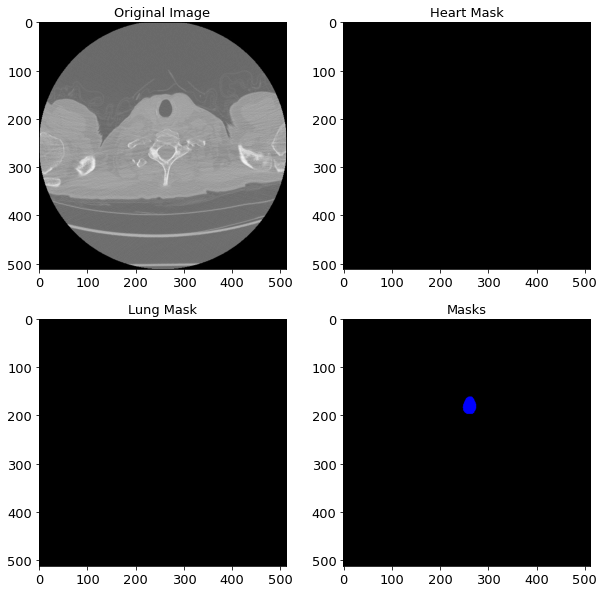

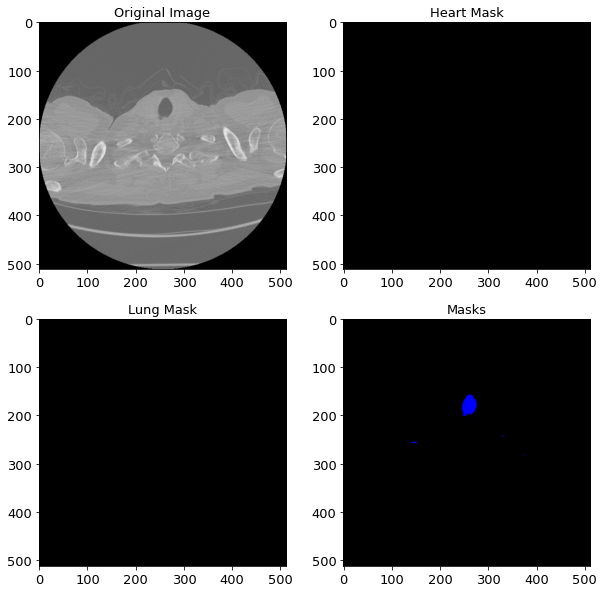

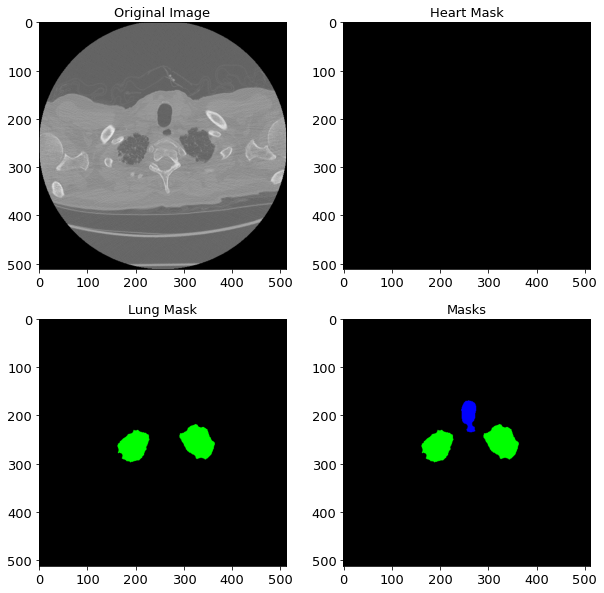

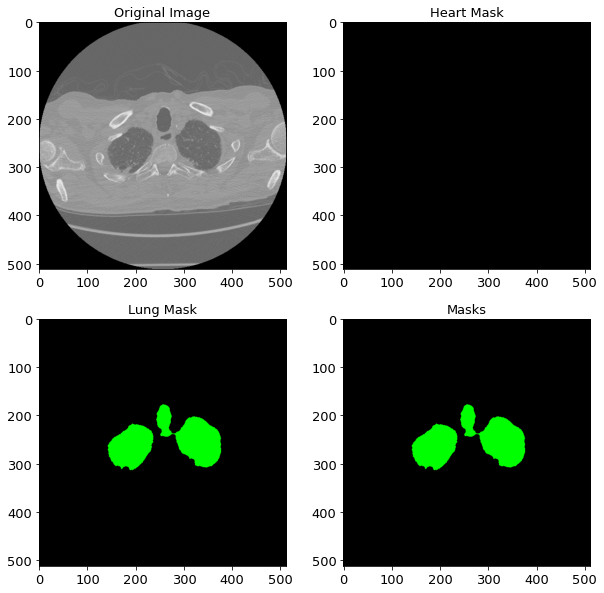

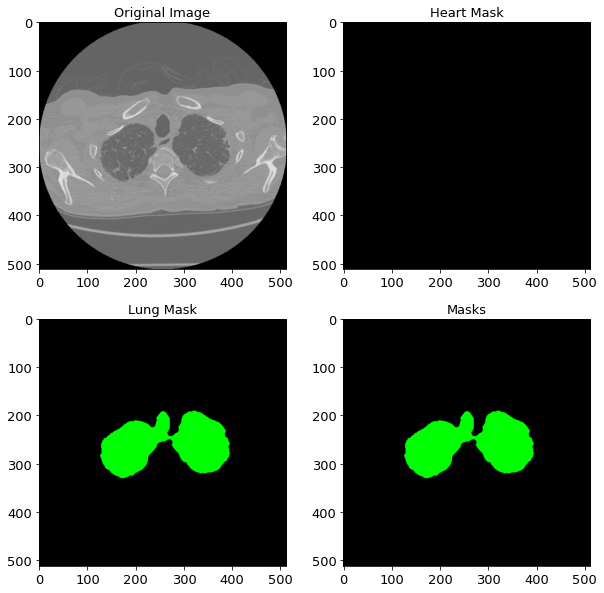

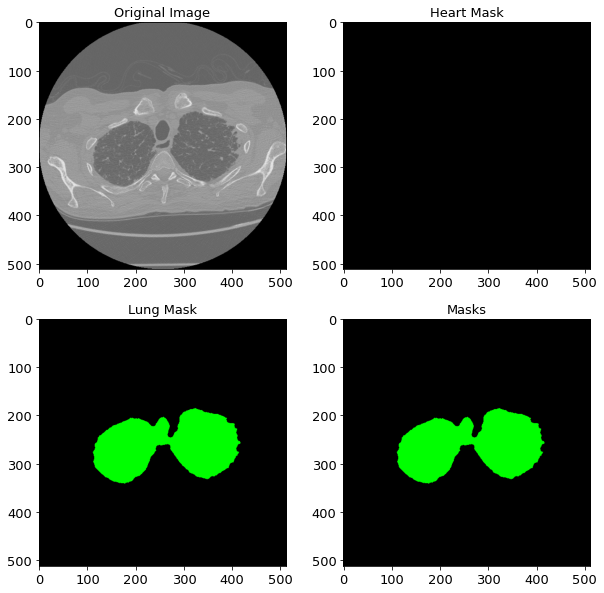

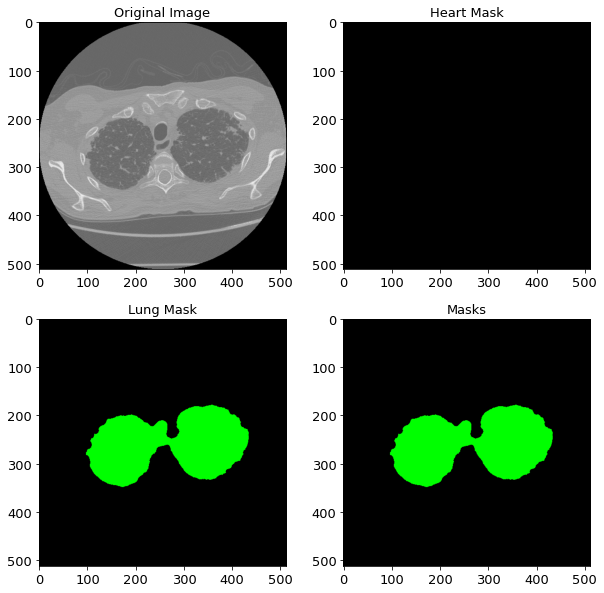

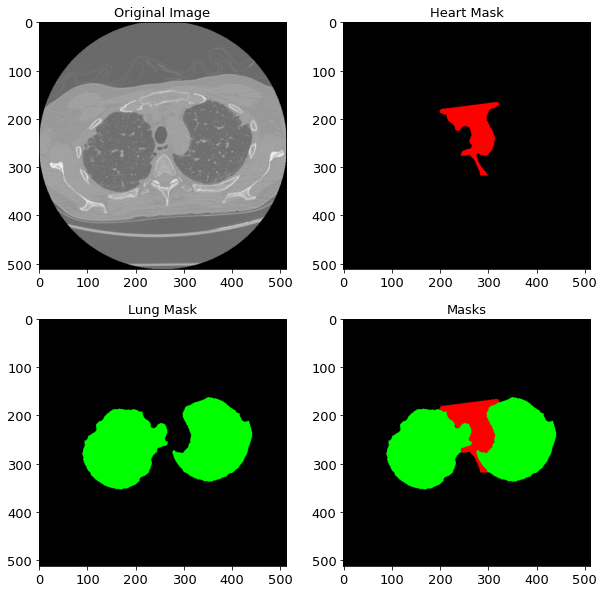

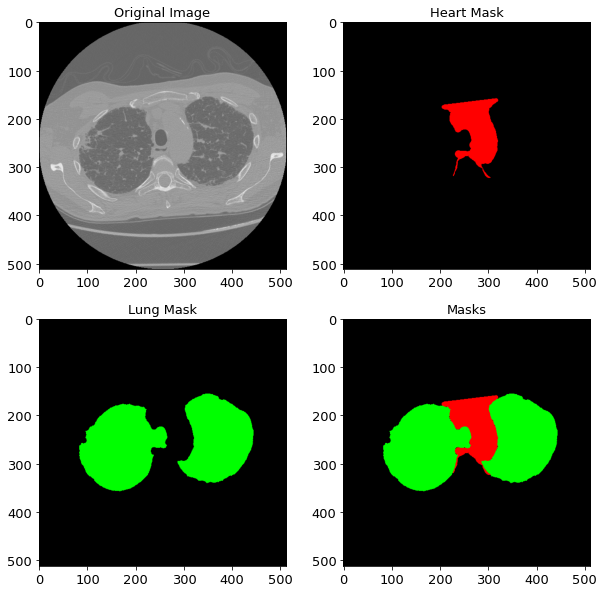

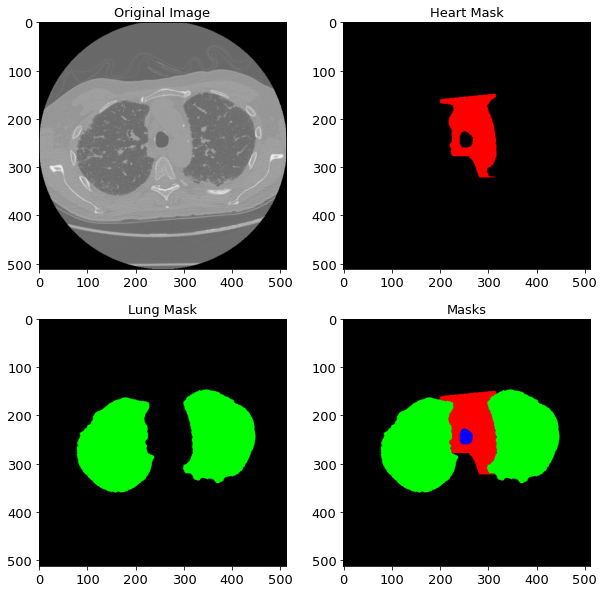

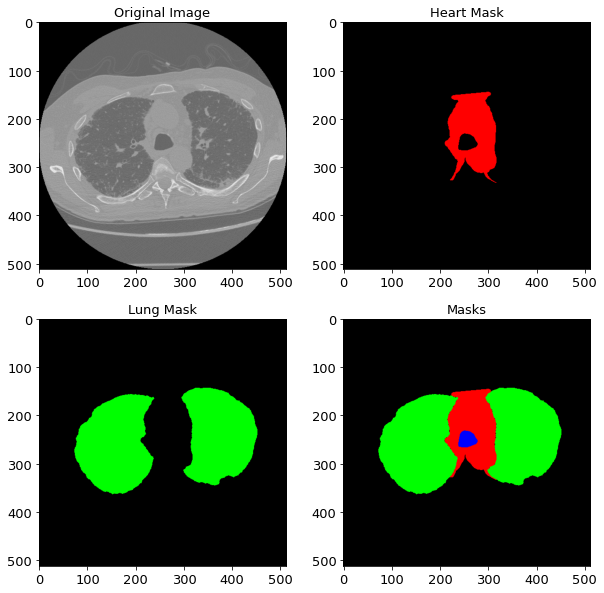

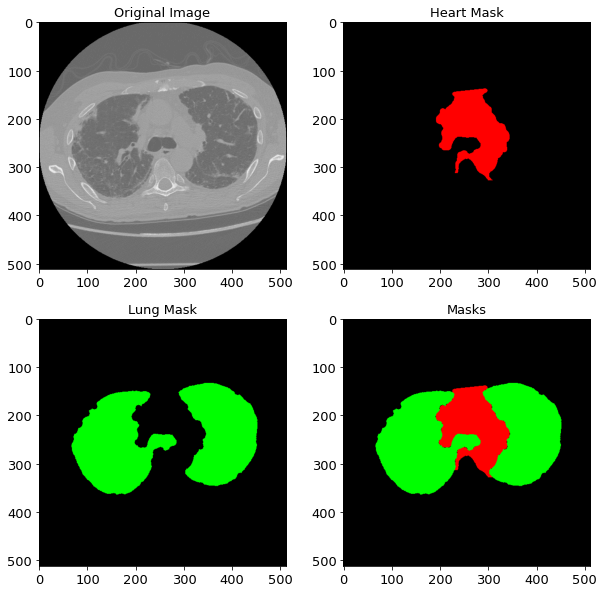

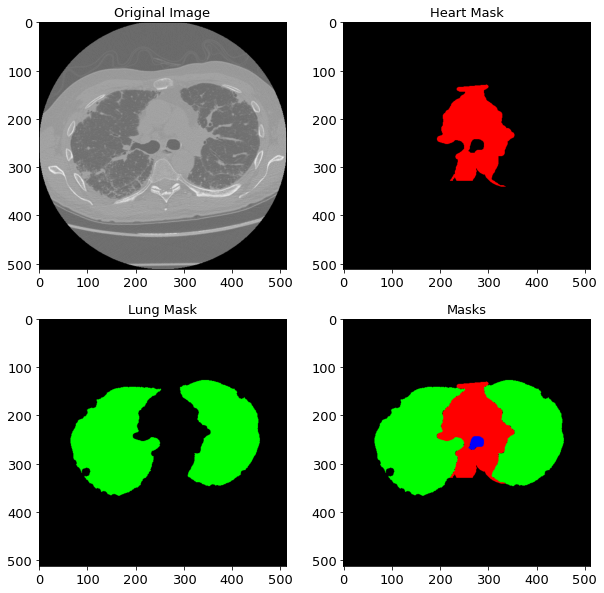

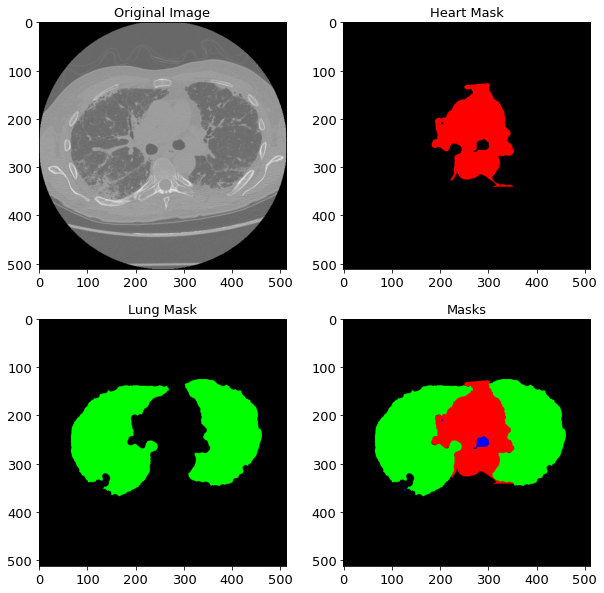

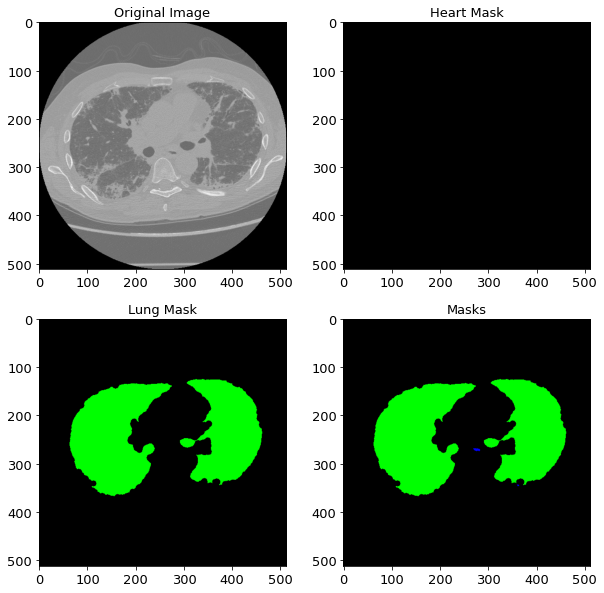

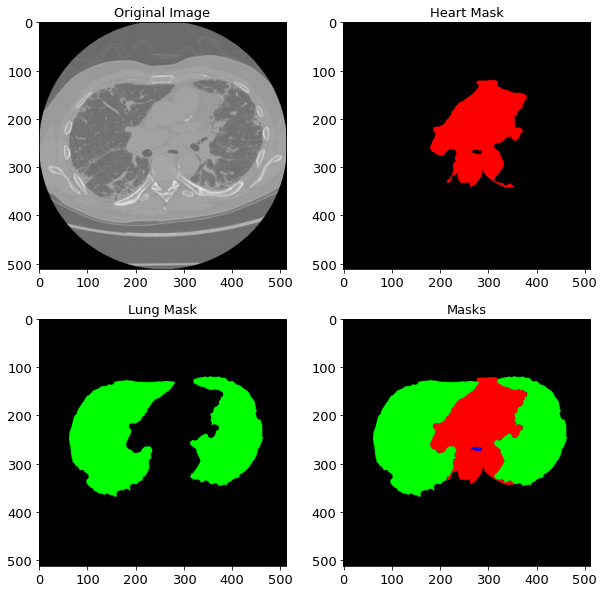

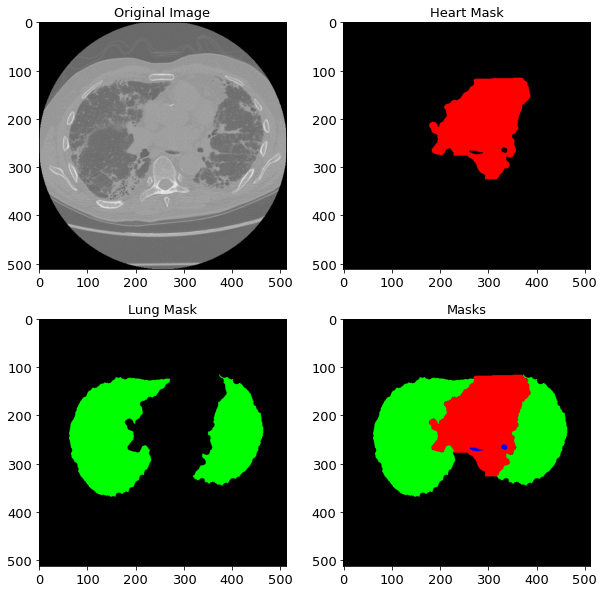

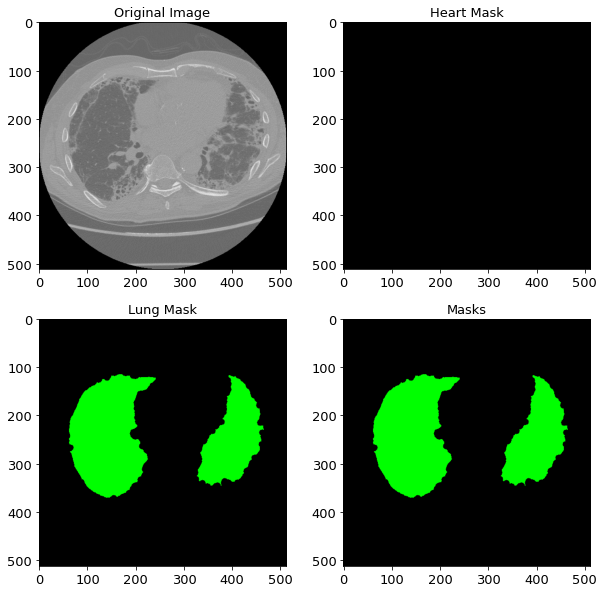

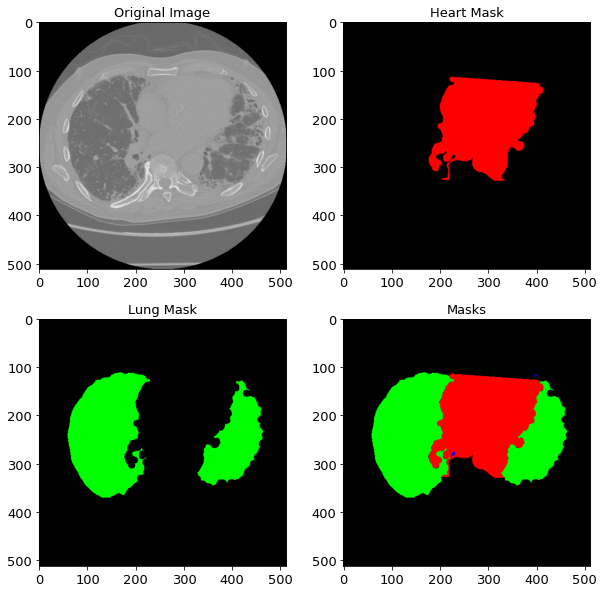

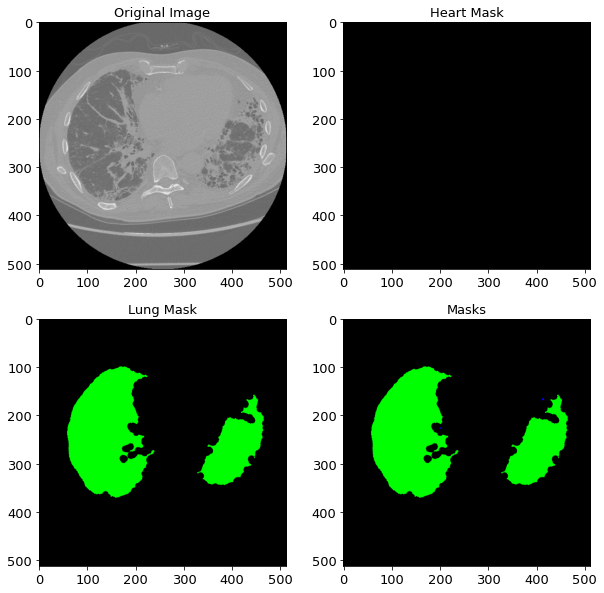

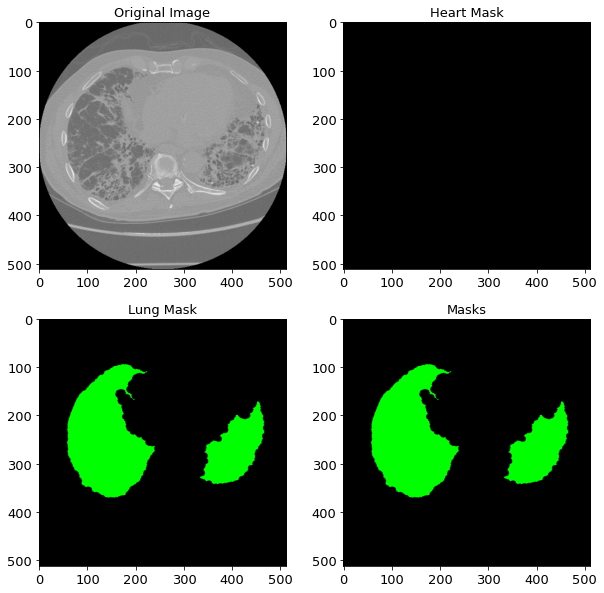

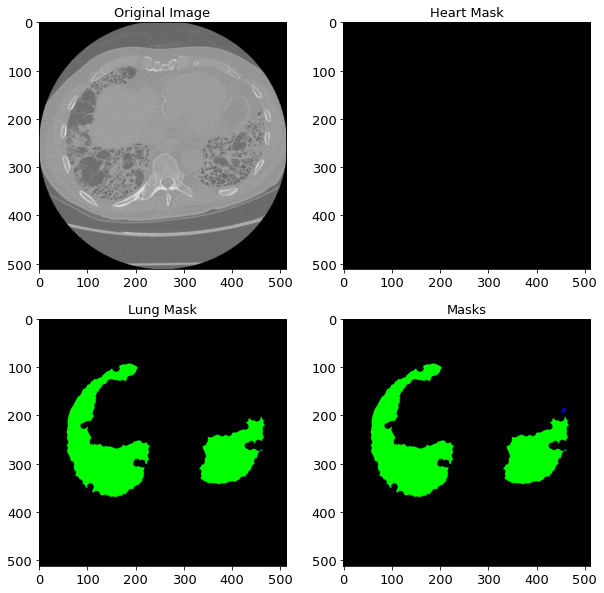

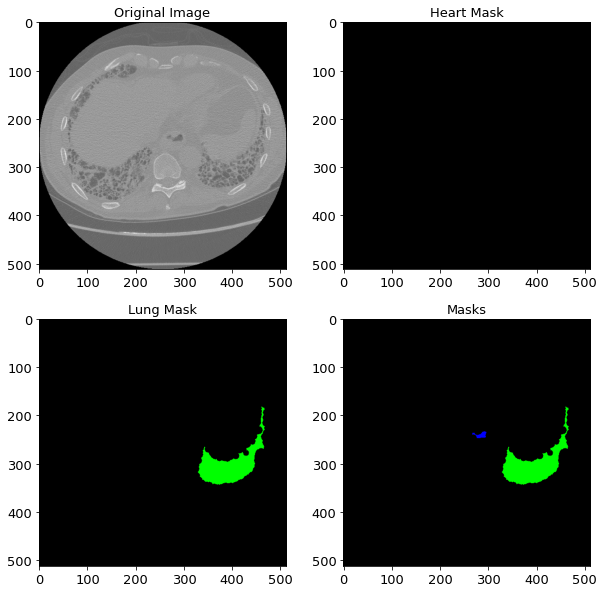

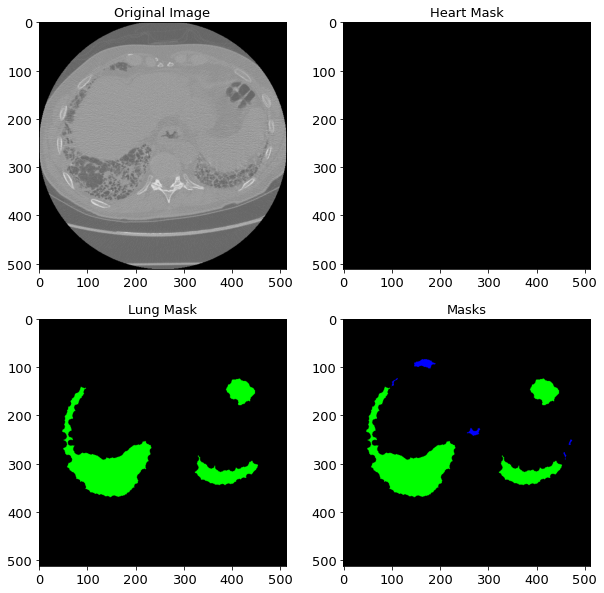

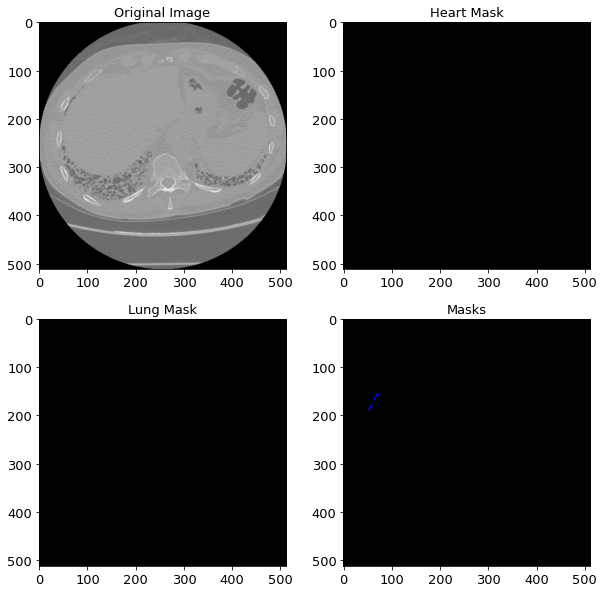

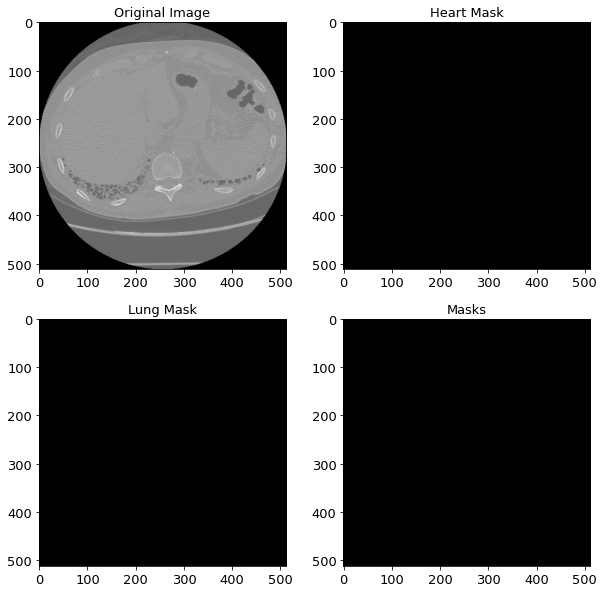

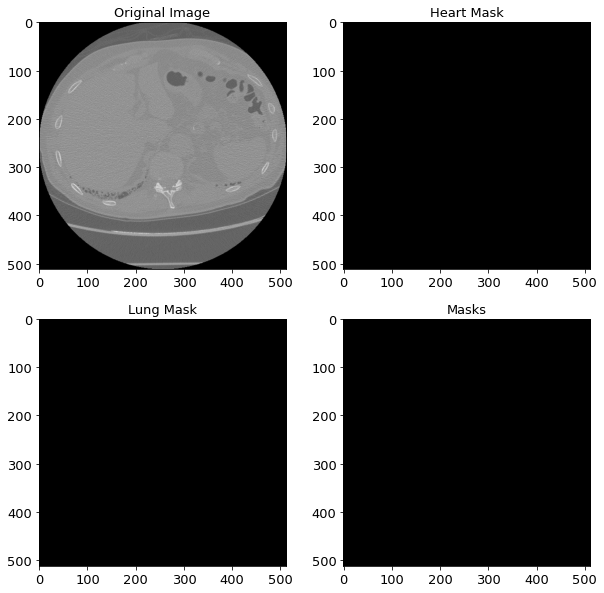

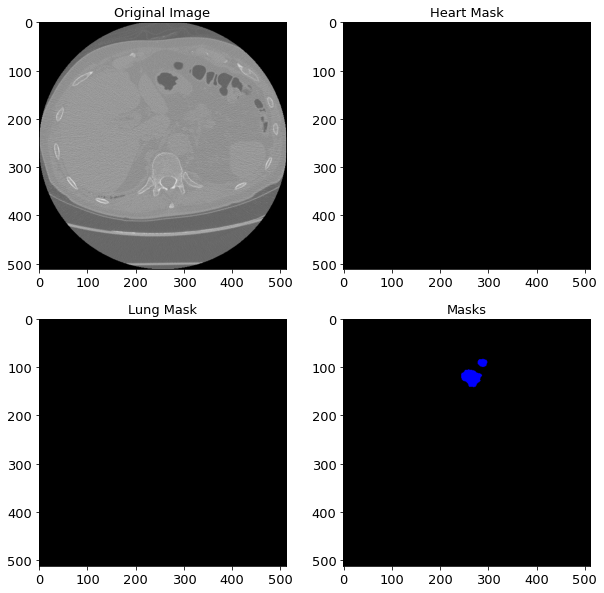

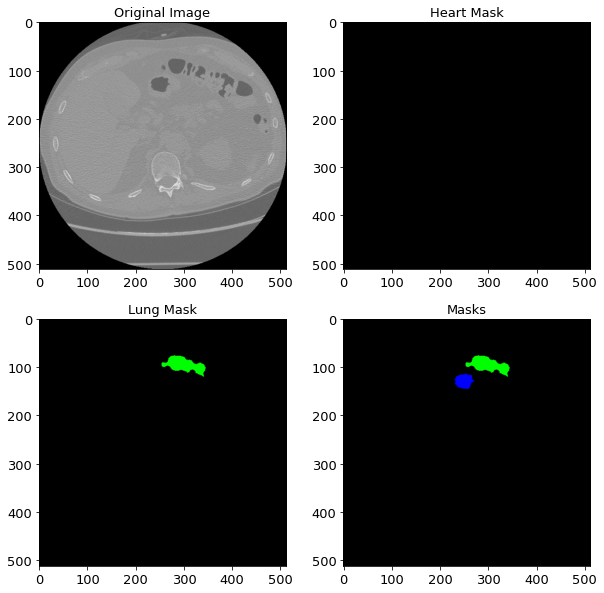

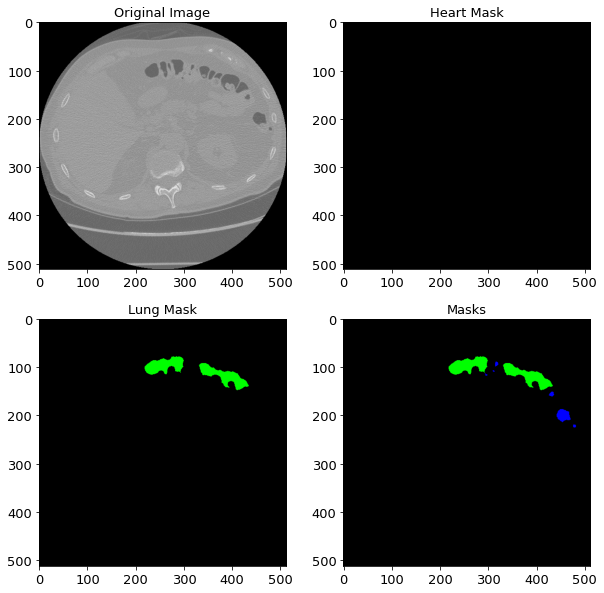

In [12]:
slices, PatientID = readSortedSlices('../sample-dataset')

for slicePath in slices:    
    modelPipeline(slicePath)